In [21]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
import galplane_footprint as gf
from rubin_sim.utils import hpid2RaDec, angularSeparation

In [2]:
agg_level = 1.5
nside = 128

sky = gf.Sky_area_generator_galplane(nside=nside, smc_radius=4, lmc_radius=6)
footprints_hp_array, labels = sky.return_maps(
    agg_level,
    root_dir=".",
    bulge_ratios={"u": 0.23, "g": 0.43, "r": 1.22, "i": 1.17, "z": 0.82, "y": 0.65},
    dusty_plane_ratios={
        "u": 0.08,
        "g": 0.12,
        "r": 0.31,
        "i": 0.31,
        "z": 0.28,
        "y": 0.22,
    },
)

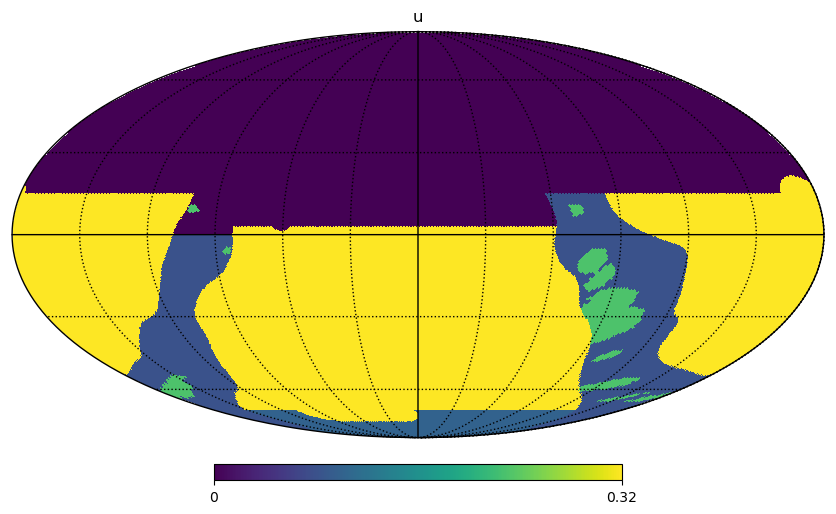

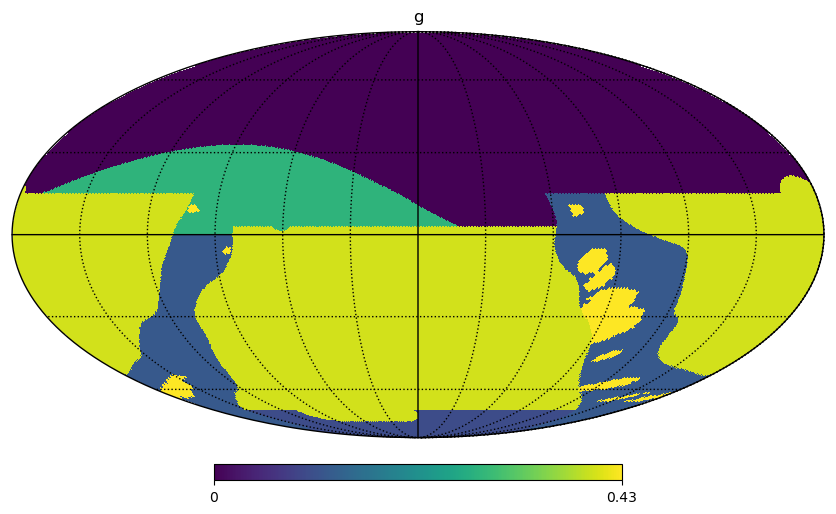

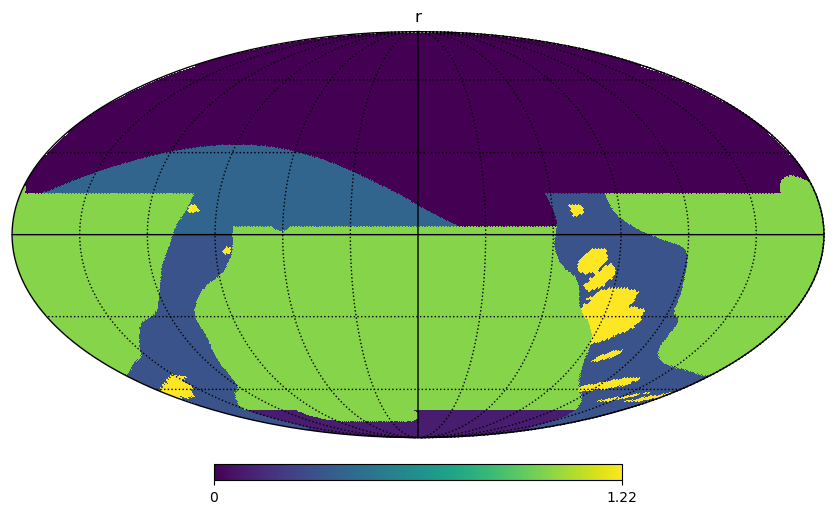

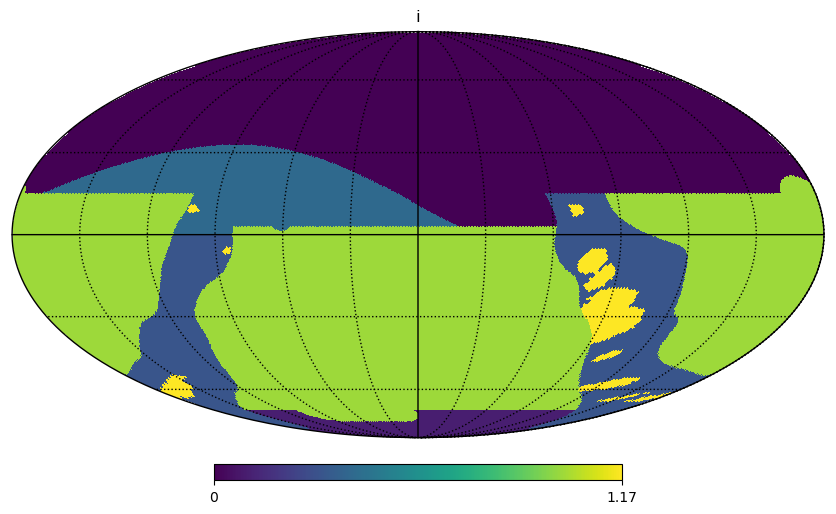

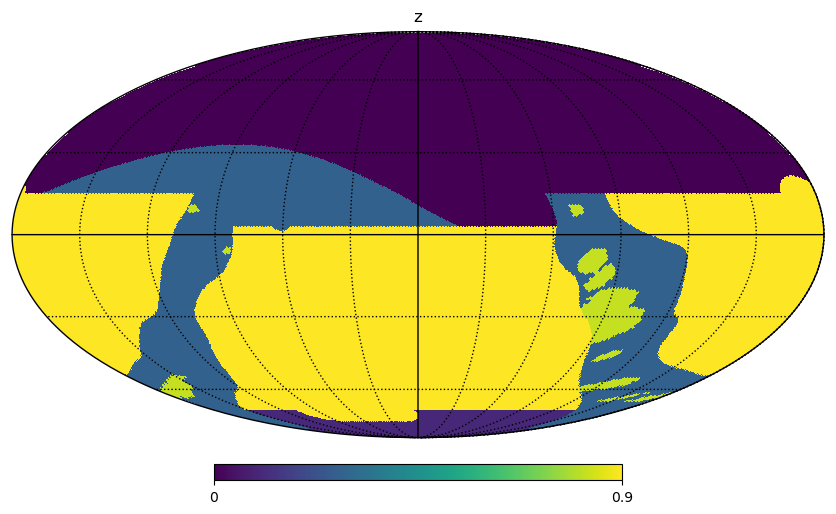

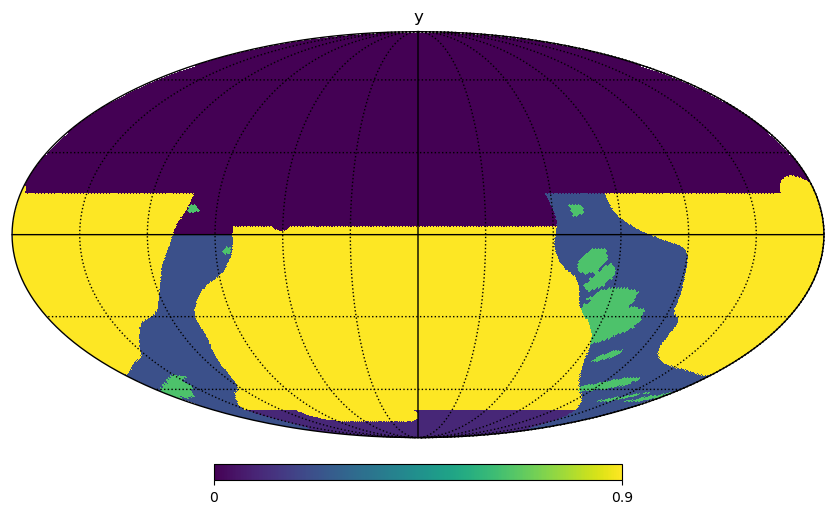

In [4]:
for key in footprints_hp_array.dtype.names:
    hp.mollview(footprints_hp_array[key], title=key)
    hp.graticule()

In [5]:
np.unique(footprints_hp_array[key])

array([0.  , 0.1 , 0.22, 0.65, 0.9 ])

In [6]:
gp_pix = np.where(footprints_hp_array[key] == 0.65)[0]

In [7]:
gp_pix

array([ 79247,  79249,  79513, ..., 188182, 188184, 188186])

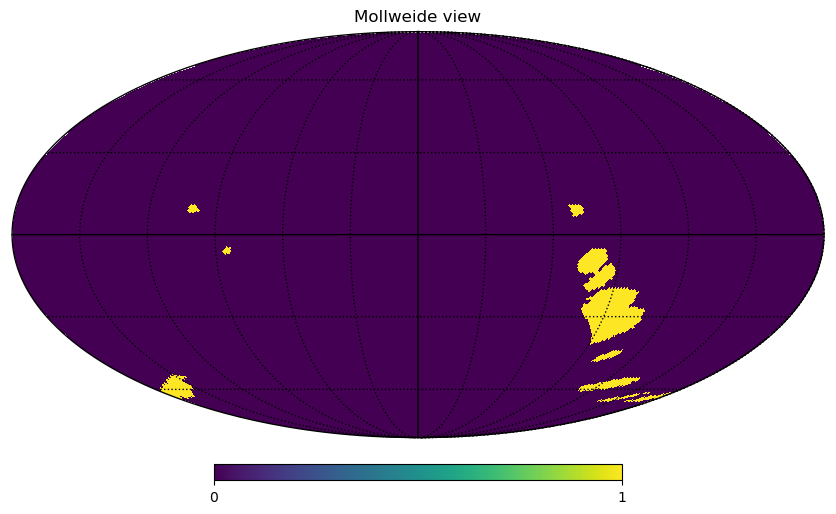

In [13]:
weighted_map = footprints_hp_array[key]*0
weighted_map[gp_pix] = 1
hp.mollview(weighted_map)
hp.graticule()

In [12]:
ind = np.arange(np.size(weighted_map))
ra, dec = hpid2RaDec(nside, ind)

In [16]:
pix = np.where((dec > 0) & (ra < 180))[0]
np.average(ra[pix], weights=weighted_map[pix]), np.average(dec[pix], weights=weighted_map[pix])

(100.8984375, 9.551787243503261)

In [18]:
pix = np.where((dec > -20) & (ra < 180) & (dec < 0))[0]
np.average(ra[pix], weights=weighted_map[pix]), np.average(dec[pix], weights=weighted_map[pix])

(84.921875, -5.712905720840726)

In [273]:
pix = np.where( (ra > 180) & (dec > 0))[0]
np.average(ra[pix], weights=weighted_map[pix]), np.average(dec[pix], weights=weighted_map[pix])

(288.84375, 9.184570311473674)

In [33]:
18/24*360


270.0

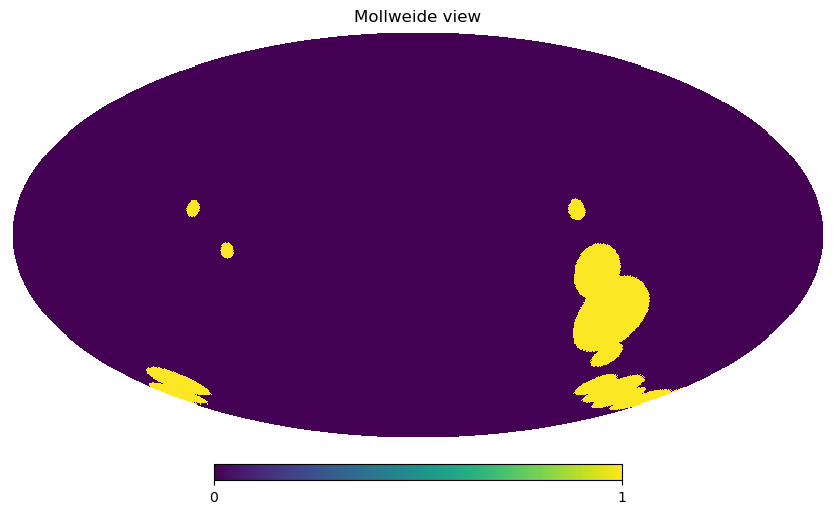

In [280]:
points = [[100.90, 9.55, 3],
         [84.92, -5.71, 3],
          [288.84, 9.18, 3.8],
         [266.3, -29, 14.5],
         [279, -13, 10],
          [256, -45, 5],
          [155, -56.5, 6.5],
          [172, -62, 5],
          [190, -65, 5],
          [210, -64, 5],
          [242, -58, 5],
          [225, -60, 6.5],
          
         ]

my_map = weighted_map*0
for point in points:
    dist = angularSeparation(ra,dec, point[0], point[1])
    good = np.where(dist < point[2])
    my_map[good] = 1
hp.mollview(my_map)

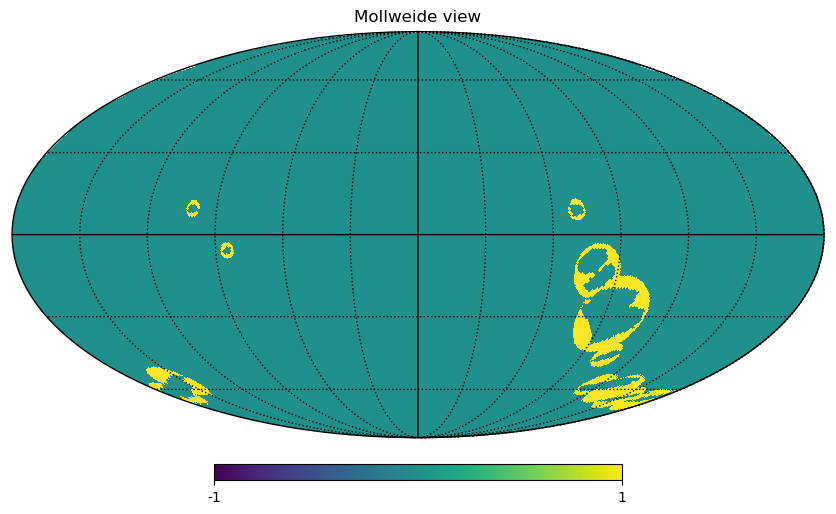

In [281]:
hp.mollview(my_map-weighted_map)
hp.graticule()